## Polynomial Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'y dataset')

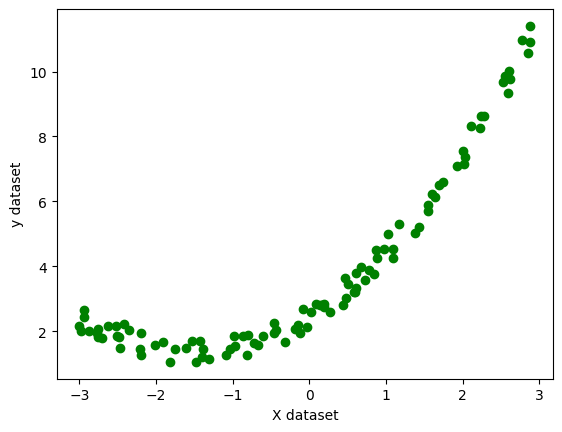

In [2]:
x = 6 * np.random.rand(100, 1) -3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.rand(100, 1)  ## quardratic equation

plt.scatter(x, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [4]:
x_train

array([[-2.20127473],
       [ 0.78069586],
       [ 0.59139601],
       [-1.82338477],
       [ 2.61240883],
       [ 1.09725666],
       [ 0.01906675],
       [ 1.74292641],
       [ 2.77349972],
       [ 0.87065362],
       [-0.32394987],
       [ 0.87630459],
       [ 1.17118009],
       [ 0.6135831 ],
       [ 1.43230386],
       [ 0.08215234],
       [ 0.72837747],
       [-1.43205476],
       [ 1.60569148],
       [-2.70922419],
       [-2.48813234],
       [ 2.59269402],
       [ 2.60467958],
       [-2.47303645],
       [ 2.53156135],
       [-0.14533513],
       [ 0.97477312],
       [-2.757399  ],
       [-1.40078795],
       [-0.07770817],
       [ 1.63933376],
       [-0.81845218],
       [-2.93938683],
       [ 0.44269444],
       [-0.98247294],
       [ 0.46209446],
       [-1.90448513],
       [-2.42119213],
       [ 1.09256143],
       [-2.51793573],
       [ 0.19008766],
       [ 2.02346152],
       [-2.76213141],
       [-1.4811972 ],
       [-0.03392195],
       [-1

In [5]:
## Lets implement the simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [6]:
regression.fit(x_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression.predict(x_test))
print(score)  ## very less accuracy because of polynomial regression 

0.7396457740443052


Text(0, 0.5, 'y label')

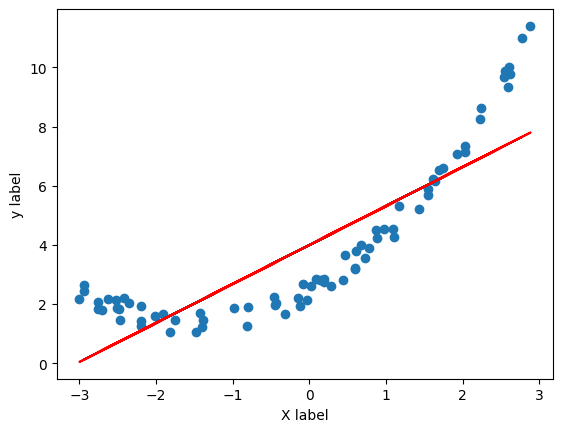

In [8]:
## visualize the best fit line our plot
plt.plot(x_train, regression.predict(x_train), color='r')
plt.scatter(x_train, y_train)
plt.xlabel('X label')
plt.ylabel('y label')

In [9]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)  ## degree 2 means x^0 + x^1 + x^2
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [11]:
x_train_poly

array([[ 1.00000000e+00, -2.20127473e+00,  4.84561045e+00],
       [ 1.00000000e+00,  7.80695865e-01,  6.09486033e-01],
       [ 1.00000000e+00,  5.91396010e-01,  3.49749241e-01],
       [ 1.00000000e+00, -1.82338477e+00,  3.32473201e+00],
       [ 1.00000000e+00,  2.61240883e+00,  6.82467991e+00],
       [ 1.00000000e+00,  1.09725666e+00,  1.20397217e+00],
       [ 1.00000000e+00,  1.90667511e-02,  3.63540999e-04],
       [ 1.00000000e+00,  1.74292641e+00,  3.03779246e+00],
       [ 1.00000000e+00,  2.77349972e+00,  7.69230067e+00],
       [ 1.00000000e+00,  8.70653617e-01,  7.58037721e-01],
       [ 1.00000000e+00, -3.23949874e-01,  1.04943521e-01],
       [ 1.00000000e+00,  8.76304586e-01,  7.67909728e-01],
       [ 1.00000000e+00,  1.17118009e+00,  1.37166281e+00],
       [ 1.00000000e+00,  6.13583101e-01,  3.76484222e-01],
       [ 1.00000000e+00,  1.43230386e+00,  2.05149436e+00],
       [ 1.00000000e+00,  8.21523403e-02,  6.74900702e-03],
       [ 1.00000000e+00,  7.28377470e-01

In [12]:
x_test_poly

array([[ 1.        , -0.18324278,  0.03357792],
       [ 1.        , -1.61280495,  2.60113981],
       [ 1.        , -0.6633735 ,  0.4400644 ],
       [ 1.        , -0.60558704,  0.36673567],
       [ 1.        , -2.77221697,  7.68518693],
       [ 1.        ,  1.38061784,  1.90610561],
       [ 1.        , -0.96347127,  0.92827689],
       [ 1.        ,  1.02026118,  1.04093288],
       [ 1.        , -1.09120358,  1.19072526],
       [ 1.        , -1.53515094,  2.35668842],
       [ 1.        , -1.30951133,  1.71481993],
       [ 1.        , -2.87079371,  8.2414565 ],
       [ 1.        ,  0.51035807,  0.26046536],
       [ 1.        , -2.98416911,  8.9052653 ],
       [ 1.        , -0.86138527,  0.74198458],
       [ 1.        ,  0.4782743 ,  0.2287463 ],
       [ 1.        ,  2.28331701,  5.21353655],
       [ 1.        ,  2.11131975,  4.4576711 ],
       [ 1.        , -1.03172602,  1.06445858],
       [ 1.        ,  2.00167548,  4.00670473],
       [ 1.        ,  2.84698462,  8.105

In [13]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)  ##     Now increase score value....

0.9919475304347944


In [14]:
print(regression.coef_)

[[0.         1.50669974 0.51054692]]


In [15]:
print(regression.intercept_)

[2.4463334]


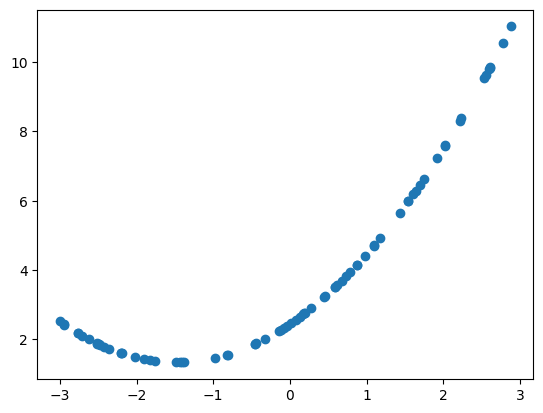

In [ ]:
plt.scatter(x_train, regression.predict(x_train_poly))

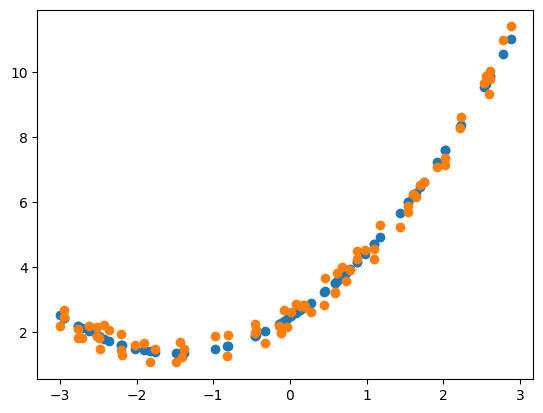

In [19]:
plt.scatter(x_train, regression.predict(x_train_poly))
plt.scatter(x_train, y_train)

In [22]:
## if degree is 3
poly = PolynomialFeatures(degree=3, include_bias=True)  ## degree 2 means x^0 + x^1 + x^2
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [23]:
x_train_poly

array([[ 1.00000000e+00, -2.20127473e+00,  4.84561045e+00,
        -1.06665198e+01],
       [ 1.00000000e+00,  7.80695865e-01,  6.09486033e-01,
         4.75823226e-01],
       [ 1.00000000e+00,  5.91396010e-01,  3.49749241e-01,
         2.06840305e-01],
       [ 1.00000000e+00, -1.82338477e+00,  3.32473201e+00,
        -6.06226572e+00],
       [ 1.00000000e+00,  2.61240883e+00,  6.82467991e+00,
         1.78288541e+01],
       [ 1.00000000e+00,  1.09725666e+00,  1.20397217e+00,
         1.32106647e+00],
       [ 1.00000000e+00,  1.90667511e-02,  3.63540999e-04,
         6.93154575e-06],
       [ 1.00000000e+00,  1.74292641e+00,  3.03779246e+00,
         5.29464870e+00],
       [ 1.00000000e+00,  2.77349972e+00,  7.69230067e+00,
         2.13345937e+01],
       [ 1.00000000e+00,  8.70653617e-01,  7.58037721e-01,
         6.59988284e-01],
       [ 1.00000000e+00, -3.23949874e-01,  1.04943521e-01,
        -3.39964402e-02],
       [ 1.00000000e+00,  8.76304586e-01,  7.67909728e-01,
      

In [24]:
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)  ##     Now increase score value....

0.9923478325281253


In [26]:
## prediction for new dataset
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
print(x_new_poly)

[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00 -2.70000000e+01]
 [ 1.00000000e+00 -2.96984925e+00  8.82000455e+00 -2.61940839e+01]
 [ 1.00000000e+00 -2.93969849e+00  8.64182723e+00 -2.54043665e+01]
 [ 1.00000000e+00 -2.90954774e+00  8.46546804e+00 -2.46306834e+01]
 [ 1.00000000e+00 -2.87939698e+00  8.29092700e+00 -2.38728702e+01]
 [ 1.00000000e+00 -2.84924623e+00  8.11820409e+00 -2.31307624e+01]
 [ 1.00000000e+00 -2.81909548e+00  7.94729931e+00 -2.24041955e+01]
 [ 1.00000000e+00 -2.78894472e+00  7.77821267e+00 -2.16930052e+01]
 [ 1.00000000e+00 -2.75879397e+00  7.61094417e+00 -2.09970269e+01]
 [ 1.00000000e+00 -2.72864322e+00  7.44549380e+00 -2.03160961e+01]
 [ 1.00000000e+00 -2.69849246e+00  7.28186157e+00 -1.96500486e+01]
 [ 1.00000000e+00 -2.66834171e+00  7.12004747e+00 -1.89987196e+01]
 [ 1.00000000e+00 -2.63819095e+00  6.96005151e+00 -1.83619449e+01]
 [ 1.00000000e+00 -2.60804020e+00  6.80187369e+00 -1.77395600e+01]
 [ 1.00000000e+00 -2.57788945e+00  6.64551400e+00 -1.71314004e

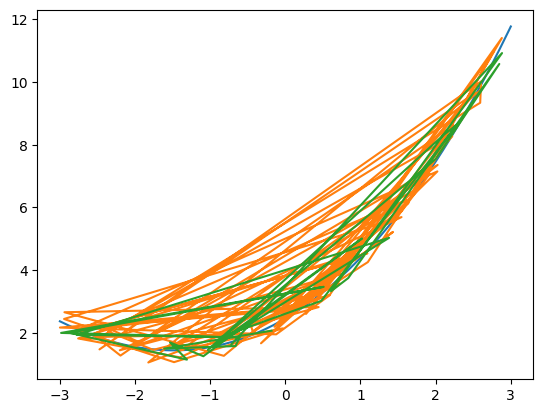

In [28]:
## visualize
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

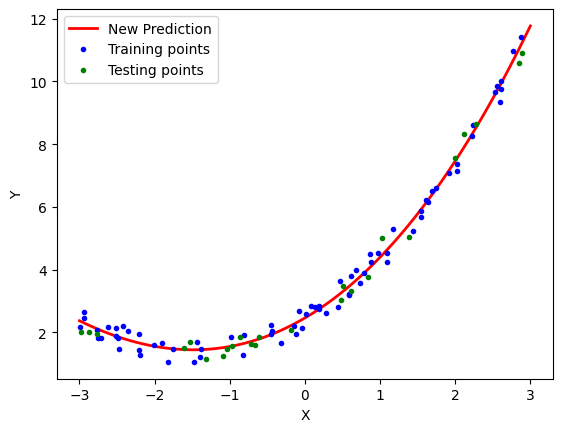

In [38]:
plt.plot(x_new, y_new, 'r-', linewidth=2, label='New Prediction')
plt.plot(x_train, y_train, 'b.', label='Training points')
plt.plot(x_test, y_test, 'g.', label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Pipeline concept

In [39]:
from sklearn.pipeline import Pipeline

In [44]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

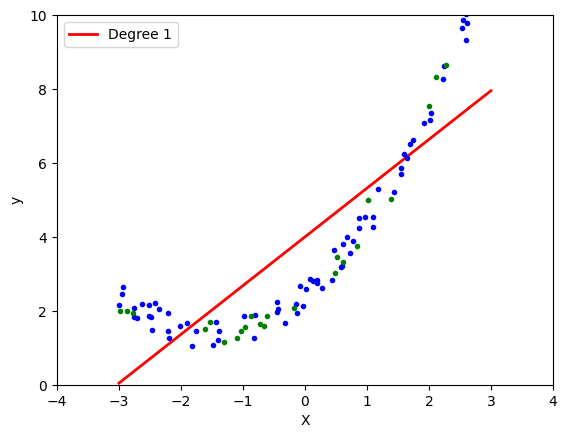

In [45]:
poly_regression(1)

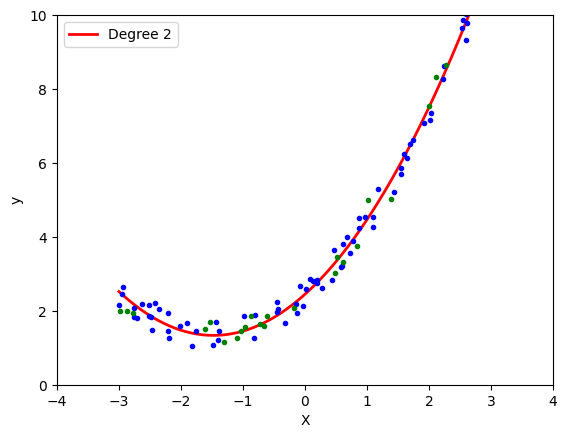

In [47]:
poly_regression(2)

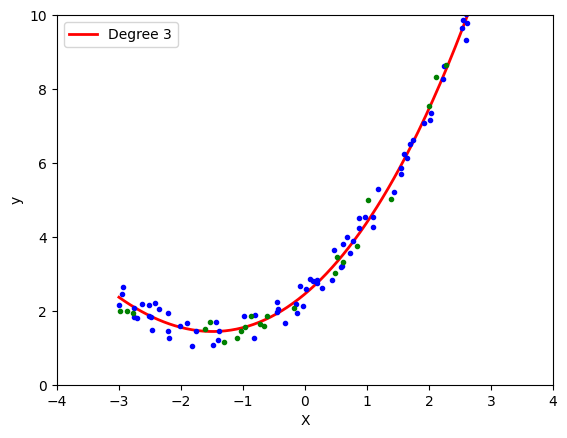

In [48]:
poly_regression(3)

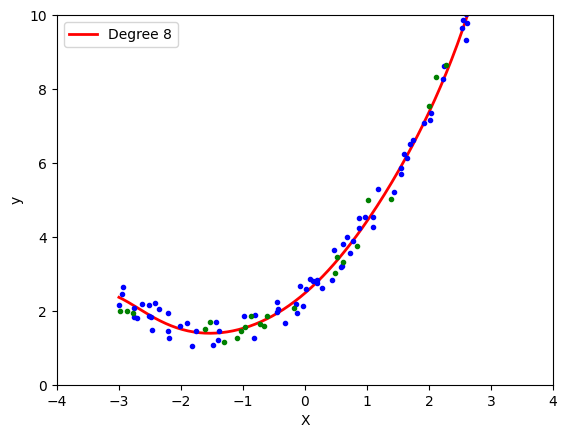

In [49]:
poly_regression(8)